## Data preparation for regression
<br/>

*Exploratory data analysis (EDA) and data cleaning (missing values, outliers) has been performed in a separate notebook.*


## Chapters

1. Import libraries
2. Read data
3. Data Assessment
4. Data Preparation

## 1. Import libraries

In [40]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import scipy.stats as st
from time import time

from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

## 2. Read data

In [2]:
train = pd.read_csv('train_clean.csv')
test = pd.read_csv('test_clean.csv')

## 3. Data assessment

In [3]:
train.shape, test.shape

((1453, 76), (1447, 75))

In [4]:
train.isnull().sum().any(), test.isnull().sum().any()

(False, False)

In [5]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [6]:
pd.options.display.max_columns=100

In [7]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


## 4. Data Preparation

First, I will join together the train and test set to apply data transformations to the features:

In [8]:
sale_price = train['SalePrice']
sale_price.shape

(1453,)

In [9]:
train_feat = train.drop('SalePrice', axis=1)
train_feat.shape

(1453, 75)

In [10]:
all_data = pd.concat((train_feat, test)).reset_index(drop=True)
all_data.shape

(2900, 75)

In [11]:
train_feat.shape[0] + test.shape[0]

2900

**Question to explore:** should I concatanate the train and test set and perform data transformations? or should I perform data transformations for the same features but separately for the train and test sets?

### 4.1 Transform skewed features

#### Numeric Features:

In [12]:
skewed_feat = all_data.skew().sort_values(ascending=False)
skewed_feat

MiscVal          21.904667
PoolArea         18.662893
LotArea          13.614618
LowQualFinSF     12.416694
3SsnPorch        11.344021
KitchenAbvGr      4.288255
BsmtFinSF2        4.148794
EnclosedPorch     4.031295
BsmtHalfBath      3.932886
ScreenPorch       3.925473
MasVnrArea        2.547692
OpenPorchSF       2.532329
WoodDeckSF        1.847554
MSSubClass        1.371518
1stFlrSF          1.176409
LotFrontage       1.093967
BsmtFinSF1        0.963250
GrLivArea         0.930218
BsmtUnfSF         0.921172
2ndFlrSF          0.834825
TotRmsAbvGrd      0.737794
Fireplaces        0.724971
HalfBath          0.700561
TotalBsmtSF       0.683219
OverallCond       0.635695
BsmtFullBath      0.620927
BedroomAbvGr      0.329321
GarageArea        0.219662
OverallQual       0.204034
MoSold            0.199581
FullBath          0.152583
YrSold            0.130148
GarageCars       -0.221378
YearRemodAdd     -0.451873
YearBuilt        -0.602366
GarageYrBlt      -3.922474
dtype: float64

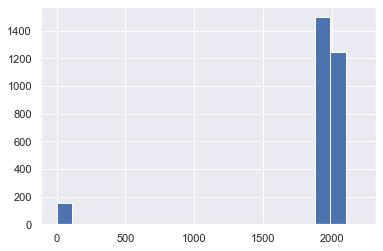

In [13]:
all_data['GarageYrBlt'].hist(bins=20);

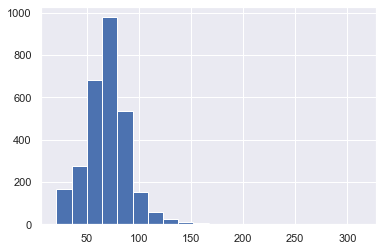

In [14]:
all_data['LotFrontage'].hist(bins=20);

**I will perform logarithmic transformation for features with skewness higher than absolute 0.2.**

In [15]:
skewed_index = skewed_feat[abs(skewed_feat) > 0.2].index
skewed_index

Index(['MiscVal', 'PoolArea', 'LotArea', 'LowQualFinSF', '3SsnPorch',
       'KitchenAbvGr', 'BsmtFinSF2', 'EnclosedPorch', 'BsmtHalfBath',
       'ScreenPorch', 'MasVnrArea', 'OpenPorchSF', 'WoodDeckSF', 'MSSubClass',
       '1stFlrSF', 'LotFrontage', 'BsmtFinSF1', 'GrLivArea', 'BsmtUnfSF',
       '2ndFlrSF', 'TotRmsAbvGrd', 'Fireplaces', 'HalfBath', 'TotalBsmtSF',
       'OverallCond', 'BsmtFullBath', 'BedroomAbvGr', 'GarageArea',
       'OverallQual', 'GarageCars', 'YearRemodAdd', 'YearBuilt',
       'GarageYrBlt'],
      dtype='object')

In [16]:
all_data_log = all_data.copy()
all_data_log[skewed_index] = all_data_log[skewed_index].apply(lambda x: np.log(x + 1))

In [17]:
all_data_log.skew().sort_values(ascending=False)

PoolArea         16.298071
3SsnPorch         8.799938
LowQualFinSF      8.759834
MiscVal           5.227649
BsmtHalfBath      3.775259
KitchenAbvGr      3.508200
ScreenPorch       2.949143
BsmtFinSF2        2.457249
EnclosedPorch     1.966247
HalfBath          0.585858
MasVnrArea        0.533944
BsmtFullBath      0.422981
2ndFlrSF          0.307560
MSSubClass        0.244343
Fireplaces        0.233545
MoSold            0.199581
WoodDeckSF        0.156211
FullBath          0.152583
YrSold            0.130148
TotRmsAbvGrd      0.017121
1stFlrSF          0.006759
OpenPorchSF      -0.042681
GrLivArea        -0.061623
YearRemodAdd     -0.459039
OverallQual      -0.539407
OverallCond      -0.552269
LotArea          -0.577905
BsmtFinSF1       -0.623910
YearBuilt        -0.628812
BedroomAbvGr     -0.986542
LotFrontage      -1.080353
GarageCars       -1.281415
BsmtUnfSF        -2.168519
GarageArea       -3.526413
GarageYrBlt      -3.942316
TotalBsmtSF      -5.088887
dtype: float64

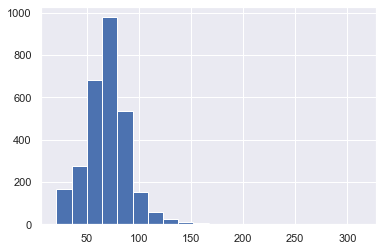

In [18]:
all_data['LotFrontage'].hist(bins=20);

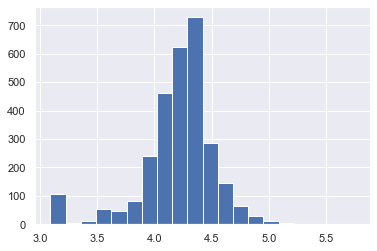

In [19]:
all_data_log['LotFrontage'].hist(bins=20);

In [20]:
all_data_log.shape

(2900, 75)

#### Target variable

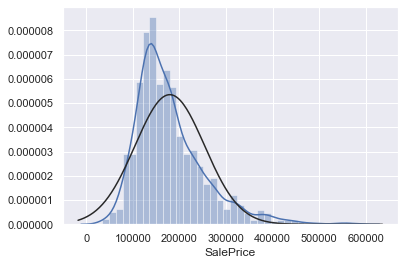

In [21]:
sns.distplot(sale_price, fit=st.norm);

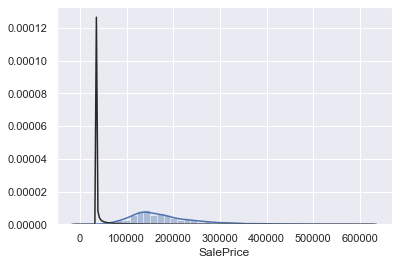

In [22]:
sns.distplot(sale_price, fit=st.lognorm);

For regression problems, it is often desirable to scale or transform both the input and the target variables since ML algorithms work better.

#### Logarithmic transformation of the target variable

In [23]:
sale_price = np.log1p(sale_price)

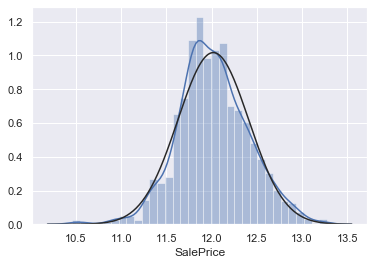

In [24]:
sns.distplot(sale_price, fit=st.norm);

### 4.2 Normalize numeric features

In [25]:
scaler = MinMaxScaler()

#numeric features
all_data_numeric = all_data_log.select_dtypes(include=np.number)

all_data_log_minmax = all_data_log.copy()
all_data_log_minmax[all_data_numeric.columns] = scaler.fit_transform(all_data_log[all_data_numeric.columns])

In [26]:
# normalized
all_data_log_minmax[all_data_numeric.columns].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.483003,0.413268,0.366271,0.813196,0.682606,0.950951,0.884882,0.716038,0.790791,0.0,0.646838,0.791152,0.345070,0.896567,0.0,0.599065,0.5,0.00000,0.50,0.63093,0.630930,0.5,0.656289,0.000000,0.987410,0.613147,0.863430,0.000000,0.624312,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50
1,0.000000,0.490307,0.391245,0.734867,0.934536,0.760143,0.437057,0.000000,0.830023,0.0,0.728731,0.836583,0.487537,0.000000,0.0,0.487537,0.0,0.63093,0.50,0.00000,0.630930,0.5,0.506159,0.430677,0.985648,0.613147,0.839518,0.784977,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25
2,0.483003,0.429990,0.422289,0.813196,0.682606,0.936906,0.868404,0.690361,0.745862,0.0,0.783246,0.799589,0.371528,0.898418,0.0,0.615031,0.5,0.00000,0.50,0.63093,0.630930,0.5,0.506159,0.430677,0.987280,0.613147,0.877627,0.000000,0.568957,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50
3,0.551764,0.383633,0.390223,0.813196,0.682606,0.319286,0.336710,0.000000,0.648431,0.0,0.811361,0.776617,0.387529,0.880400,0.0,0.600565,0.5,0.00000,0.25,0.00000,0.630930,0.5,0.585928,0.430677,0.987085,0.773706,0.885063,0.000000,0.542079,0.810539,0.0,0.0,0.0,0.0,0.090909,0.00
4,0.483003,0.508439,0.468694,0.882287,0.682606,0.929878,0.835423,0.794318,0.781767,0.0,0.798858,0.825194,0.451824,0.924356,0.0,0.691246,0.5,0.00000,0.50,0.63093,0.732487,0.5,0.719229,0.430677,0.987215,0.773706,0.921154,0.724696,0.672040,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50


In [27]:
# not normalized
all_data_log[all_data_numeric.columns].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,4.110874,4.189655,9.042040,2.079442,1.791759,7.602900,7.602900,5.283204,6.561031,0.0,5.017280,6.753438,6.753438,6.751101,0.0,7.444833,0.693147,0.000000,2,0.693147,1.386294,0.693147,2.197225,0.000000,7.602900,1.098612,6.308098,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.0,2,2008
1,3.044522,4.394449,9.169623,1.945910,2.197225,7.589336,7.589336,0.000000,6.886532,0.0,5.652489,7.141245,7.141245,0.000000,0.0,7.141245,0.000000,0.693147,2,0.000000,1.386294,0.693147,1.945910,0.693147,7.589336,1.098612,6.133398,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.0,5,2007
2,4.110874,4.234107,9.328212,2.079442,1.791759,7.601902,7.602401,5.093750,6.188264,0.0,6.075346,6.825460,6.825460,6.765039,0.0,7.488294,0.693147,0.000000,2,0.693147,1.386294,0.693147,1.945910,0.693147,7.601902,1.098612,6.411818,0.000000,3.761200,0.000000,0.0,0.0,0.0,0.0,9,2008
3,4.262680,4.110874,9.164401,2.079442,1.791759,7.557995,7.586296,0.000000,5.379897,0.0,6.293419,6.629363,6.869014,6.629363,0.0,7.448916,0.693147,0.000000,1,0.000000,1.386294,0.693147,2.079442,0.693147,7.600402,1.386294,6.466145,0.000000,3.583519,5.609472,0.0,0.0,0.0,0.0,2,2006
4,4.110874,4.442651,9.565284,2.197225,1.791759,7.601402,7.601402,5.860786,6.486161,0.0,6.196444,7.044033,7.044033,6.960348,0.0,7.695758,0.693147,0.000000,2,0.693147,1.609438,0.693147,2.302585,0.693147,7.601402,1.386294,6.729824,5.262690,4.442651,0.000000,0.0,0.0,0.0,0.0,12,2008


### 4.3 One-hot encoding for categorical features

In [28]:
# Create dummy variables
all_data_final = pd.get_dummies(all_data_log_minmax)

In [29]:
all_data_final.shape

(2900, 284)

In [46]:
all_data_final.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,...,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.483003,0.413268,0.366271,0.813196,0.682606,0.950951,0.884882,0.716038,0.790791,0.0,0.646838,0.791152,0.345070,0.896567,0.0,0.599065,0.5,0.00000,0.50,0.63093,0.630930,0.5,0.656289,0.000000,0.987410,0.613147,0.863430,0.000000,0.624312,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50,0,0,0,1,0,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,0.000000,0.490307,0.391245,0.734867,0.934536,0.760143,0.437057,0.000000,0.830023,0.0,0.728731,0.836583,0.487537,0.000000,0.0,0.487537,0.0,0.63093,0.50,0.00000,0.630930,0.5,0.506159,0.430677,0.985648,0.613147,0.839518,0.784977,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25,0,0,0,1,0,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0.483003,0.429990,0.422289,0.813196,0.682606,0.936906,0.868404,0.690361,0.745862,0.0,0.783246,0.799589,0.371528,0.898418,0.0,0.615031,0.5,0.00000,0.50,0.63093,0.630930,0.5,0.506159,0.430677,0.987280,0.613147,0.877627,0.000000,0.568957,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50,0,0,0,1,0,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,0.551764,0.383633,0.390223,0.813196,0.682606,0.319286,0.336710,0.000000,0.648431,0.0,0.811361,0.776617,0.387529,0.880400,0.0,0.600565,0.5,0.00000,0.25,0.00000,0.630930,0.5,0.585928,0.430677,0.987085,0.773706,0.885063,0.000000,0.542079,0.810539,0.0,0.0,0.0,0.0,0.090909,0.00,0,0,0,1,0,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,0.483003,0.508439,0.468694,0.882287,0.682606,0.929878,0.835423,0.794318,0.781767,0.0,0.798858,0.825194,0.451824,0.924356,0.0,0.691246,0.5,0.00000,0.50,0.63093,0.732487,0.5,0.719229,0.430677,0.987215,0.773706,0.921154,0.724696,0.672040,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50,0,0,0,1,0,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


### 4.4 Train and Test sets

The train and test sets are now ready to be used for ML regression.

In [30]:
train_final = all_data_final[:train.shape[0]]
test_final = all_data_final[train.shape[0]:]

In [31]:
train_final.shape, test_final.shape

((1453, 284), (1447, 284))

### 4.5 Shuffle and Split Data

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_final, 
                                                    sale_price, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 1162 samples.
Testing set has 291 samples.


In [33]:
1162 + 291 == train_final.shape[0]

True

## Machine Learning

In [89]:
# Import libraries
# Models
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor

# Metrics
from sklearn.metrics import mean_squared_error

In [90]:
def train_predict(learner, X_train, y_train, X_test, y_test):
    results = {}
    
    start = time()
    learner = learner.fit(X_train, y_train)
    end = time()
    results['train_time'] = end-start
    
    start = time()
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train)
    end = time()
    results['pred_time'] = end-start
    
    # Root-Mean-Squared-Error (RMSE) evaluation
    results['rmse_train'] = np.sqrt(mean_squared_error(y_train, predictions_train))
    results['rmse_test'] = np.sqrt(mean_squared_error(y_test, predictions_test))
    
    print("{} trained on {} samples.".format(learner.__class__.__name__, len(X_train)))
    
    return results

### Regression

In [91]:
clf_1 = Lasso(random_state=0)
clf_2 = Ridge(random_state=0)
clf_3 = ElasticNet(random_state=0)
clf_4 = GradientBoostingRegressor(random_state=0)

results = []

for clf in [clf_1, clf_2, clf_3, clf_4]:
    clf_name = clf.__class__.__name__
    results.append((clf_name, train_predict(clf, X_train, y_train, X_test, y_test)))

Lasso trained on 1162 samples.
Ridge trained on 1162 samples.
ElasticNet trained on 1162 samples.
GradientBoostingRegressor trained on 1162 samples.


In [92]:
results

[('Lasso',
  {'train_time': 0.013320684432983398,
   'pred_time': 0.004986286163330078,
   'rmse_train': 0.3919708738112894,
   'rmse_test': 0.3941547120726964}),
 ('Ridge',
  {'train_time': 0.007508039474487305,
   'pred_time': 0.004194498062133789,
   'rmse_train': 0.09190448171834119,
   'rmse_test': 0.1097254746383052}),
 ('ElasticNet',
  {'train_time': 0.010993480682373047,
   'pred_time': 0.005129337310791016,
   'rmse_train': 0.3919708738112894,
   'rmse_test': 0.3941547120726964}),
 ('GradientBoostingRegressor',
  {'train_time': 1.759138584136963,
   'pred_time': 0.010103940963745117,
   'rmse_train': 0.0768378501256253,
   'rmse_test': 0.11136441483826316})]